# (연구) gglite – 내부기능

신록예찬  
2024-01-15

# Options

In [99]:
options(jupyter.plot_scale=4)
options(repr.plot.width=6,repr.plot.height=4,repr.plot.res=300)

# Imports

In [100]:
library(devtools)
install_github("seoyeonc/gglite",force=TRUE)
library(gglite)
library(tidyverse)
library(patchwork)

── R CMD build ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/Rtmp6JCCsE/remotesf878558db2fe0/seoyeonc-gglite-cc4f3ac/DESCRIPTION’
─  preparing ‘gglite’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘gglite_0.1.0.tar.gz’
   


# `gglite`

In [101]:
gglite <- function(...){
    ggplot2::ggplot(...)+
    ggplot2::theme_bw()+
    ggplot2::theme(panel.border=ggplot2::element_blank(),axis.line=ggplot2::element_line(colour="black"))+
    ggplot2::theme(axis.title.x=ggplot2::element_text(size=ggplot2::rel(1),lineheight=0.9,face="bold.italic"))+
    ggplot2::theme(axis.title.y=ggplot2::element_text(size=ggplot2::rel(1),lineheight=0.9,face="bold.italic"))+
    ggplot2::theme(plot.title=ggplot2::element_text(size=ggplot2::rel(1),lineheight=0.9,face="bold"))+
    ggplot2::theme(plot.margin = ggplot2::unit(c(3,3,0,0), "mm"))
}

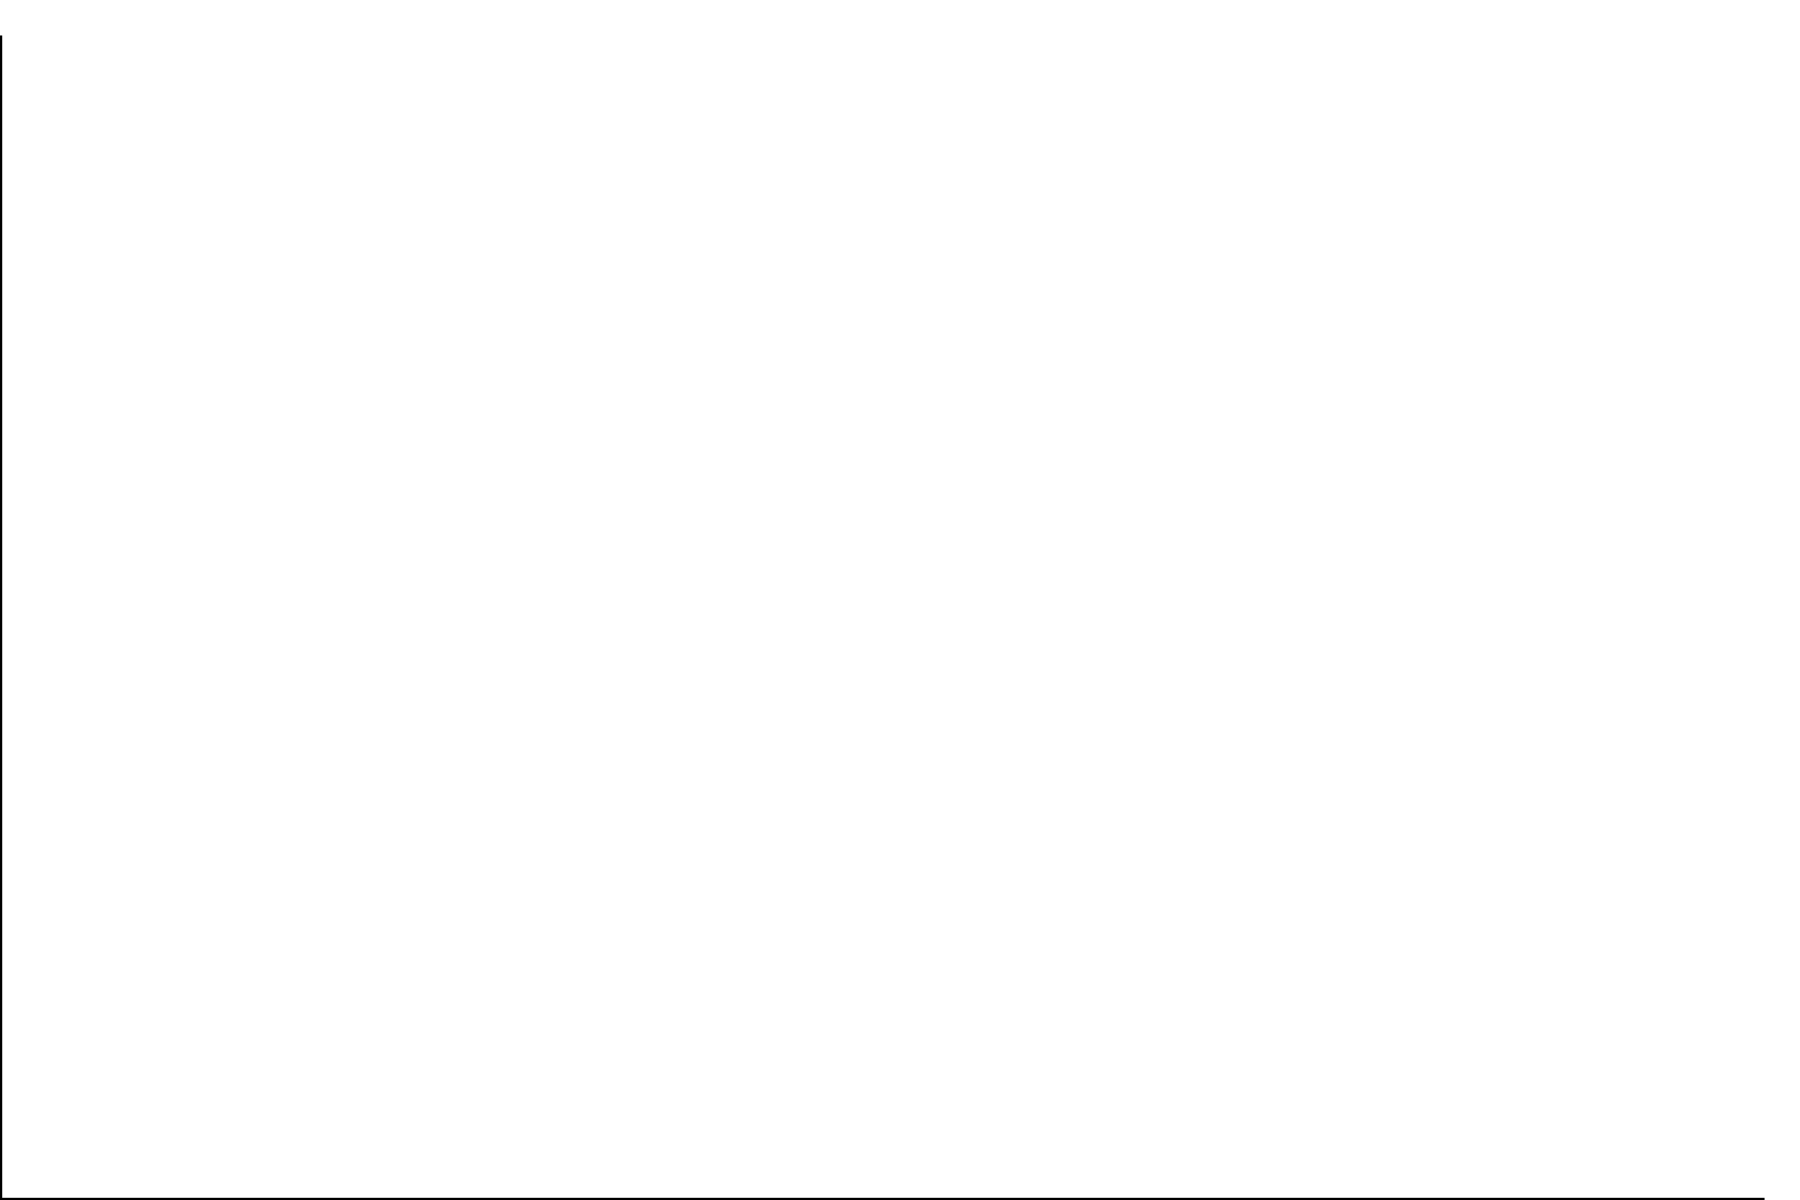

In [102]:
gglite()

# `make_df`

In [103]:
make_df <- function(x, y = NULL, label = NULL) {
  if (is.null(y)) {
    y=x
    if (!is.vector(y)) {
      x = 1:dim(y)[1]
    } else {
      x = 1:length(y)
    }
  }
  #---#
  if (!is.vector(y)) {
      dfx = data.frame(x)
      dfy = data.frame(y)
      df = cbind(dfx,dfy)
      df = tidyr::pivot_longer(df,cols = colnames(dfy), names_to = "group", values_to = "y")
  } else {
      if (is.null(label)){
          df = data.frame(x=x,y=y)
      } else { 
      df = data.frame(x=x,y=y,group=label)
      }
  }
  return(df)
}

In [104]:
make_df(rnorm(10),label="A")

In [105]:
make_df(c('A','A','A','B','B','B'))

In [106]:
make_df(c(1,2,4),rnorm(3))

# 버그수정

In [159]:
y1=rnorm(100)
y2=rnorm(100)+3

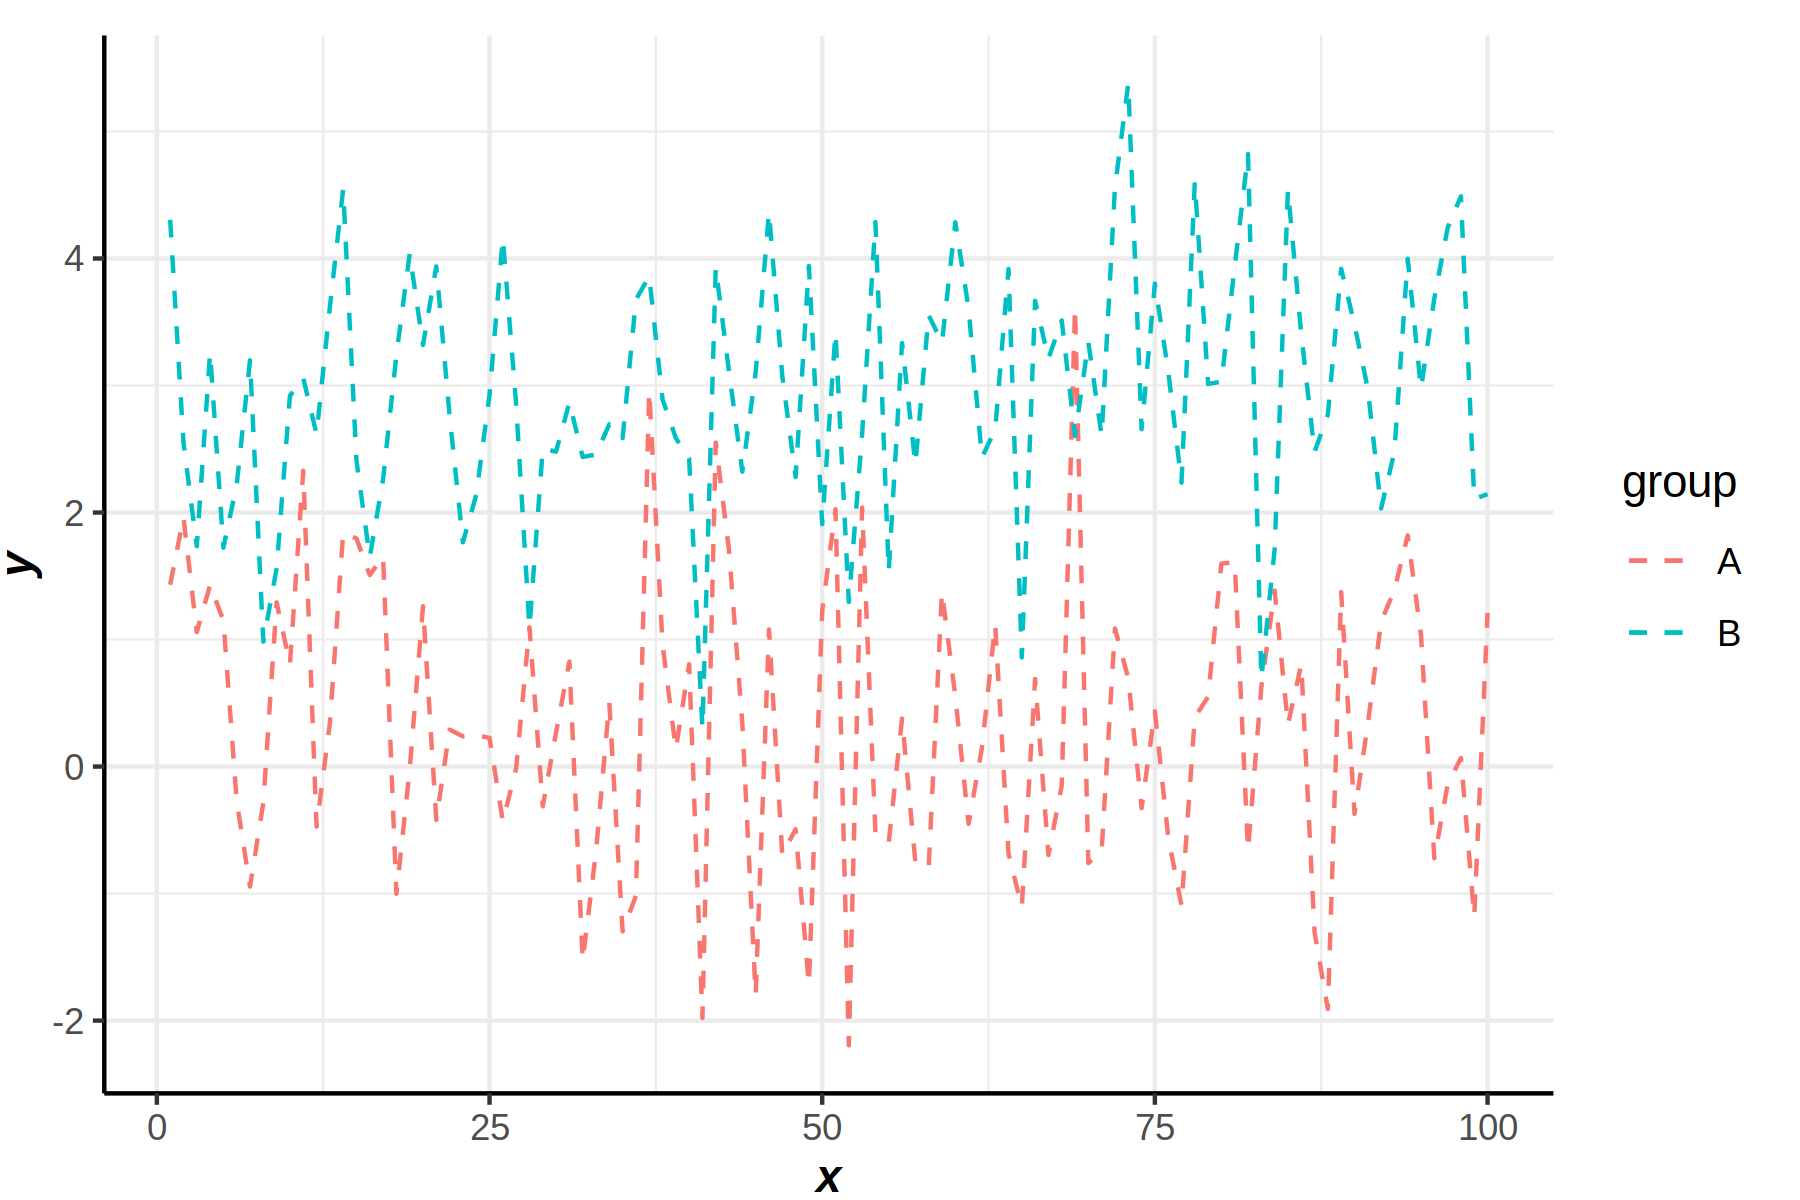

In [314]:
gglite()+line(y1,label='A',col=2,lty=2)+line(y2,label='B',col=4,lty=2)

In [339]:
line <- function(x, y = NULL, label = NULL, ...) {
  args <- list(...)
  df <- make_df(x, y, label)
  geom_type <- ggplot2::geom_line
  if (is.null(df$group)) {
      aes <- ggplot2::aes(x = x, y = y)
      return(make_geom(df,geom_type,aes,args))
  } else {
      aes <- ggplot2::aes(x = x, y = y, col = group)
      if (any(names(args) %in% c("col", "color", "colour"))){
          args[c("col", "color", "colour")] <- NULL
          # col <- args$col
          # if (is.null(col)) col <- args$color
          # if (is.null(col)) col <- args$colour
          return(list(make_geom(df,geom_type,aes,args)))
      } else {    
          return(make_geom(df,geom_type,aes,args))
      }
  }
}

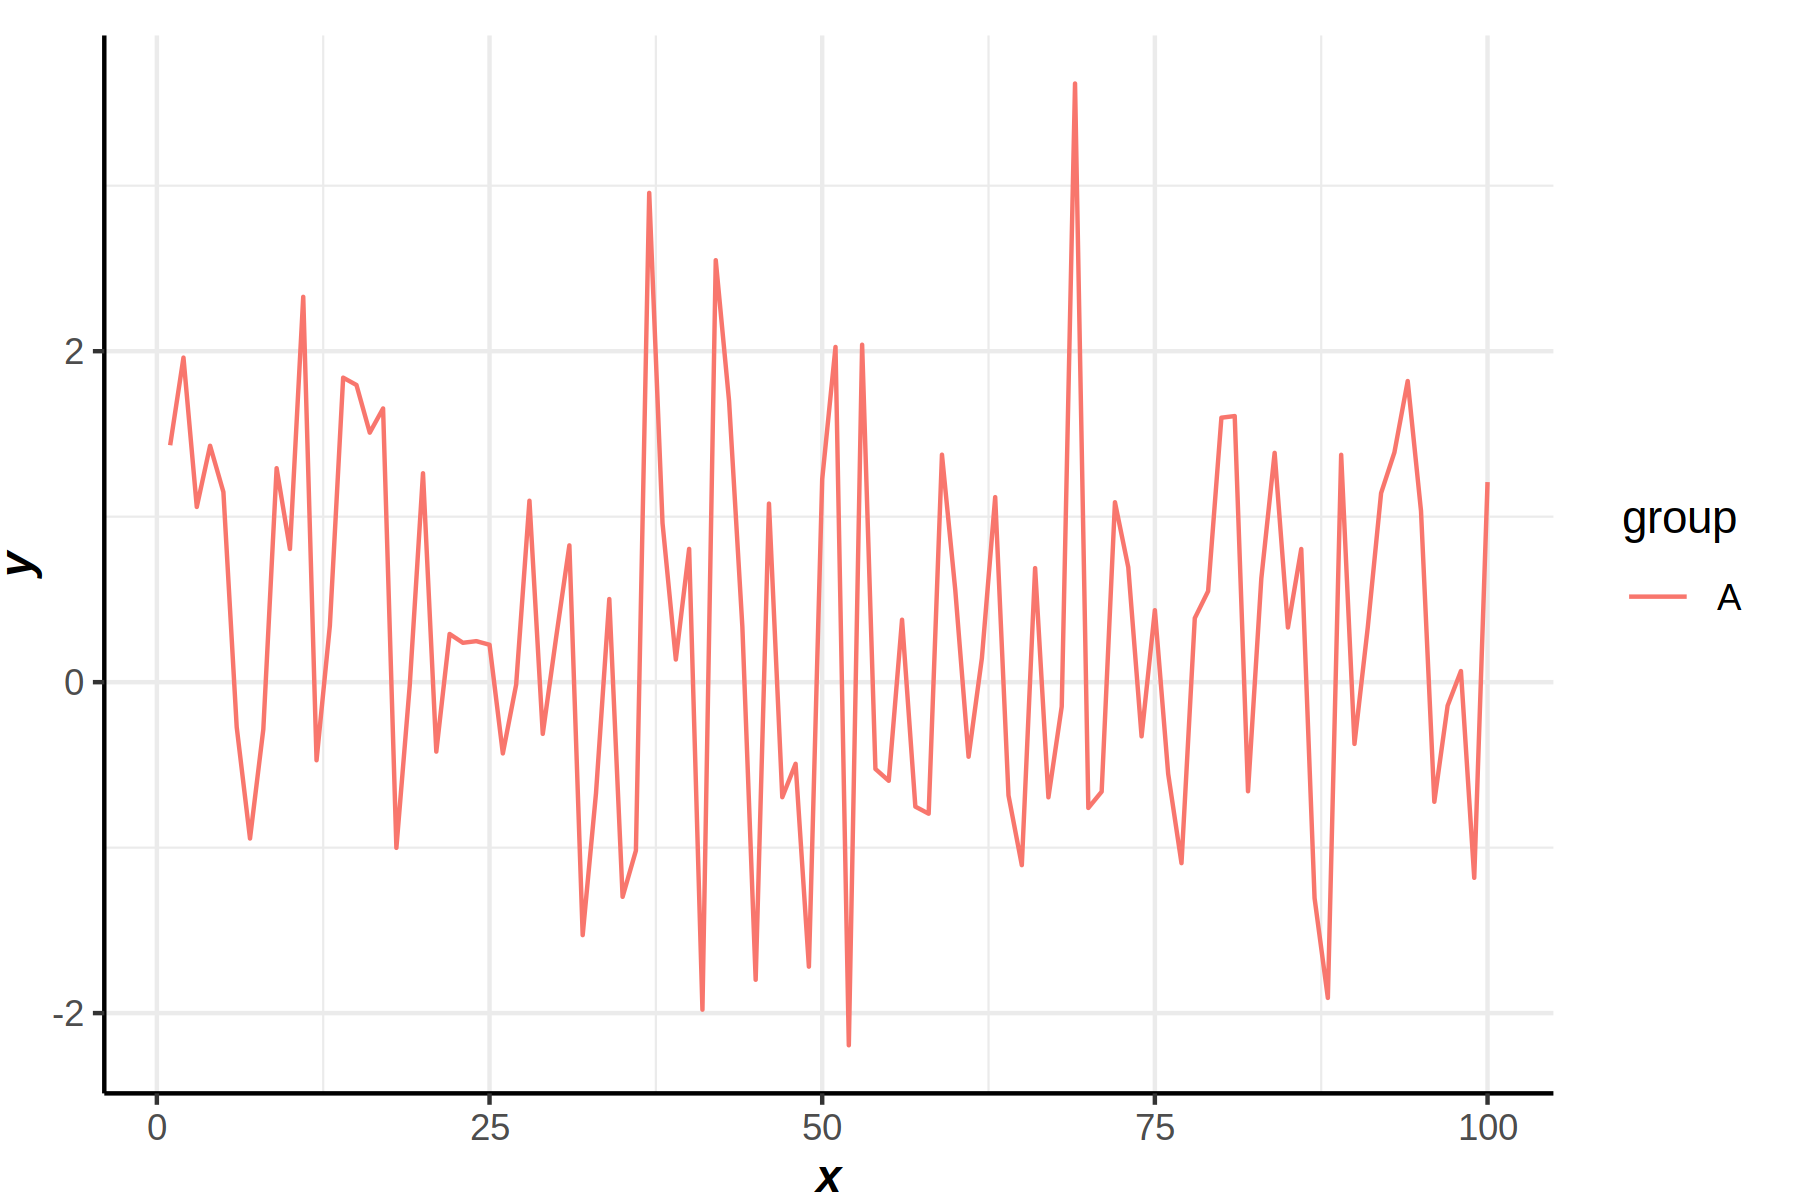

In [342]:
gglite()+line(y1,lty=1,label="A",col=2)#+line(y2,lty=2,col=3,label="B")